In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

In [15]:
%matplotlib inline
plt.style.use('seaborn')

In [16]:
cd D:\STUDY\SEM-4\ML\bank\bank-additional

D:\STUDY\SEM-4\ML\bank\bank-additional


In [17]:
data = pd.read_csv('bank-additional-full.csv',sep = ';')
data.head(5)
#data.columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
data.groupby('contact').size()

contact
cellular     26144
telephone    15044
dtype: int64

EDA

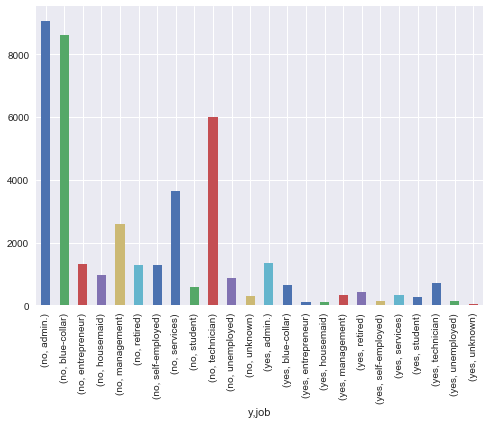

In [19]:
data.groupby(['y','job']).size().plot(kind='bar')

In [159]:
a = data_new.groupby('y').size()/data_new.groupby('y').size().sum()
a
#plt.pie(a,labels = [0,1])

y
no     0.797504
yes    0.202496
dtype: float64

OverSampling Data

In [21]:
data_y_yes = data[data['y'] == 'yes']

In [22]:
data_new = data.append(data_y_yes)

K-NN

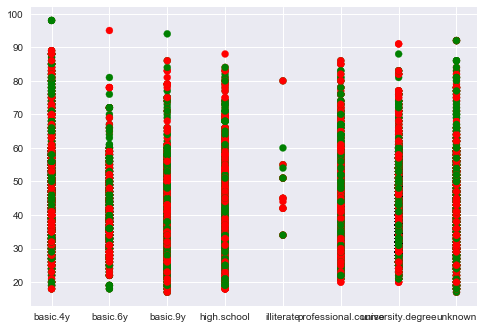

In [23]:
y_set = [0,1]
color = ['red' if l == 0 else 'green' for l in y_set]
plt.scatter(data_new['education'],data_new['age'],color =color)
plt.show()

In [135]:
xdata = data_new.iloc[:,:-1]
ydata = data_new['y']

In [136]:
ydata = pd.get_dummies(ydata)

In [139]:
ydata = ydata.drop('no',axis =1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

In [142]:
X_train.dtypes[X_train.dtypes != 'object'].index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [143]:
import warnings
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
transform_list = X_train.dtypes[X_train.dtypes != 'object'].index
scaler.fit(X_train[transform_list])
warnings.filterwarnings("ignore")
X_train[transform_list]= scaler.transform(X_train[transform_list])  
X_test[transform_list]= scaler.transform(X_test[transform_list])

In [144]:
obj_train_df = X_train.select_dtypes(include=['object'])
obj_train_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [145]:
obj_train_df = X_train.select_dtypes(include=['object']).copy()
df_4 = pd.get_dummies(obj_train_df,obj_train_df.columns,drop_first = True)
df_5 = X_train.drop(obj_train_df.columns, axis = 1)
X_train = pd.concat([df_5,df_4],axis = 1)


In [146]:
obj_test_df = X_test.select_dtypes(include=['object']).copy()
df_6 = pd.get_dummies(obj_test_df,obj_test_df.columns,drop_first = True)
df_7 = X_test.drop(obj_test_df.columns, axis = 1)
X_test = pd.concat([df_7,df_6],axis = 1)

In [148]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [149]:
y_pred = neigh.predict(X_test)  

In [150]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[11197   865]
 [  970  2092]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.92     12062
          1       0.71      0.68      0.70      3062

avg / total       0.88      0.88      0.88     15124



Error rate vs number of neighbors KNN Learning curve

In [35]:
error = []
error_train = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    error.append(np.mean(pred_i != y_test))
    error_train.append(np.mean(pred_train != y_train))

Text(0,0.5,'Mean Error')

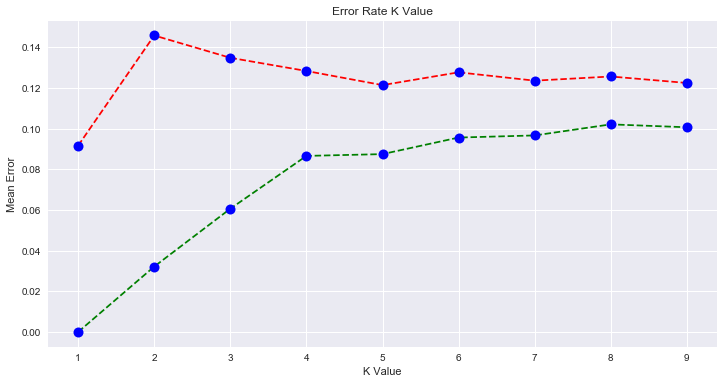

In [37]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 10), error_train, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

Accuracy of KNN with Training dataset size

In [43]:
from sklearn.metrics import accuracy_score

In [46]:
box_knn= np.zeros((5,3))
a = [10,25,50,75,100]
for i in range(len(a)):
    X_train_cut = X_train[:int((X_train.shape[0])*a[i]/100)]
    y_train_cut = y_train[:int((y_train.shape[0])*a[i]/100)]
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_cut,y_train_cut)
    y_cut_pred = knn.predict(X_train_cut)
    y_test_pred = knn.predict(X_test)
    train_acc = accuracy_score(y_train_cut, y_cut_pred)#(confusion_matrix(y_train_cut,y_cut_pred).diagonal()[0]+confusion_matrix(y_train_cut,y_cut_pred).diagonal()[1])/(confusion_matrix(y_train_cut,y_cut_pred).flatten().sum())
    test_acc = accuracy_score(y_test, y_test_pred)#(confusion_matrix(y_test,y_test_pred).diagonal()[0]+confusion_matrix(y_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_test,y_test_pred).flatten().sum())
    box_knn[i][0] = a[i]
    box_knn[i][1] = train_acc
    box_knn[i][2] = test_acc   

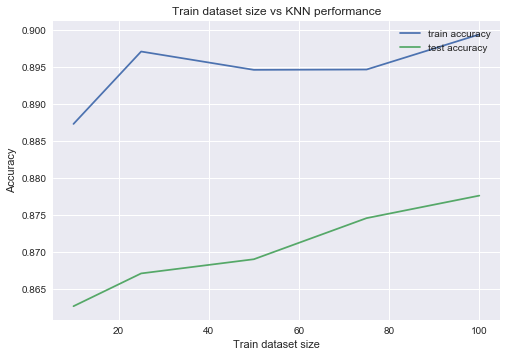

In [47]:
fig_2 =plt.figure()
ax = fig_2.add_subplot(111)
ax.plot(box_knn[:,0],box_knn[:,1],label = 'train accuracy')
ax.plot(box_knn[:,0],box_knn[:,2],label = 'test accuracy')
ax.legend(loc='upper right')
ax.set_title('Train dataset size vs KNN performance')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train dataset size')
plt.show()

Cross-validation with tuning the hyperparameters in KNN algorithm

In [61]:
def featurebuild(data,n):
    df = []
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    if len(df.dtypes[df.dtypes == 'object']) != 0:
        obj_df = df.select_dtypes(include=['object']).copy()
        df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
        df_5 = df.drop(obj_df.columns, axis = 1)
        df_6 = pd.concat([df_5,df_4],axis = 1)
        return df_6
    else:
        return df

In [79]:
data_knn = featurebuild(xdata,34)

In [80]:
scores = np.zeros((21,6))
metric = ['euclidean', 'cityblock','minkowski']
for j in range(1,15):
    #X_svm_test, y_svm_train, y_svm_test = train_test_split( dat , ydata , test_size=0.33, random_state=42)
    for i in range(len(metric)):
        #clf = svm.SVC(kernel=kernel[i])
        #score = cross_val_score(clf, dat, ydata, cv=5)
        model = KNeighborsClassifier(n_neighbors = j, metric=metric[i])
        cv_results = cross_validate(model, data_knn, ydata, cv= 5, return_train_score=True)
        #print(cv_results['train_score'])
        #svclassifier.fit(X_svm_train, y_svm_train)
        #y_train_pred = svclassifier.predict(X_svm_train)
        #y_test_pred = svclassifier.predict(X_svm_test)
        #train_acc = (confusion_matrix(y_svm_train,y_train_pred).diagonal()[0]+confusion_matrix(y_svm_train,y_train_pred).diagonal()[1])/(confusion_matrix(y_svm_train,y_train_pred).flatten().sum())
        #test_acc = (confusion_matrix(y_svm_test,y_test_pred).diagonal()[0]+confusion_matrix(y_svm_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_svm_test,y_test_pred).flatten().sum())
        scores[j][i] = cv_results['train_score'].mean()
        scores[j][i+3] = cv_results['test_score'].mean()
#scores

In [91]:
plot_data = np.matrix(scores)

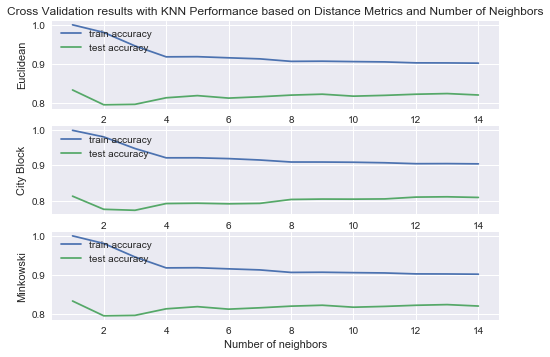

In [286]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xdist = np.arange(1,15,1)
ax1.plot(xdist,plot_data[1:15,0],label = 'train accuracy')
ax1.plot(xdist,plot_data[1:15,3],label = 'test accuracy')
ax1.legend(loc='upper left')
ax1.set_ylabel('Euclidean')
ax2.plot(xdist,plot_data[1:15,1],label = 'train accuracy')
ax2.plot(xdist,plot_data[1:15,4],label = 'test accuracy')
ax2.legend(loc='upper left')
ax2.set_ylabel('City Block')
ax3.plot(xdist,plot_data[1:15,2],label = 'train accuracy')
ax3.plot(xdist,plot_data[1:15,5],label = 'test accuracy')
ax3.legend(loc='upper left')
ax3.set_ylabel('Minkowski')
ax3.set_xlabel('Number of neighbors')
ax1.set_title('Cross Validation results with KNN Performance based on Distance Metrics and Number of Neighbors')
plt.show()

Searching the optimal parameter values for KNN algorithm

In [57]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
#from imutils import paths
import numpy as np
import argparse
#import imutils
import time
#import cv2
import os

In [58]:
params = {"n_neighbors": np.arange(1, 31, 2),
"metric": ["euclidean", "cityblock"]}

In [60]:
model = KNeighborsClassifier()
grid = RandomizedSearchCV(model, params)
start = time.time()
grid.fit(X_train, y_train)
# evaluate the best randomized searched model on the testing
# data
print("[INFO] randomized search took {:.2f} seconds".format(
time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] randomized search best parameters: {}".format(
grid.best_params_))

[INFO] randomized search took 531.97 seconds
[INFO] grid search accuracy: 87.69%
[INFO] randomized search best parameters: {'n_neighbors': 17, 'metric': 'euclidean'}


ROC curve

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [151]:
model_knn = KNeighborsClassifier(n_neighbors = 17, metric =  'euclidean')
model_knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [152]:
scores = model_knn.predict_proba(X_test)

In [153]:
probs = scores[:, 1]

array([0.11764706, 0.        , 0.11764706, ..., 0.        , 0.        ,
       0.23529412])

In [154]:
auc = roc_auc_score(y_test, probs)

In [155]:
auc

0.9345168756330915

In [162]:
fpr, tpr, thresholds = roc_curve(y_test,scores[:,1])

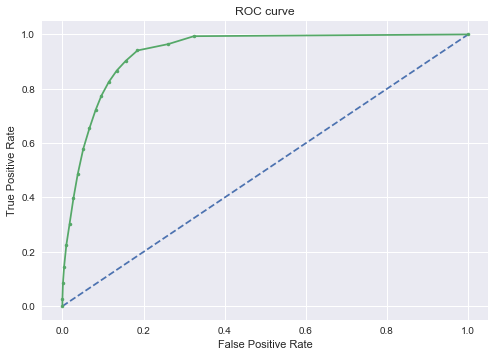

In [163]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the plot
plt.show()

ANN

In [171]:
from sklearn.neural_network import MLPClassifier

In [210]:
asdf = [53,53,53]

In [223]:
mlp = MLPClassifier(hidden_layer_sizes=asdf,max_iter=500)
model_ann = mlp.fit(X_train,y_train)

In [212]:
predictions = model_ann.predict(X_test)

In [213]:
predictions_prob = model_ann.predict_proba(X_test)[:,1]

In [214]:
auc = roc_auc_score(y_test, predictions_prob)

In [215]:
fpr, tpr, thresholds = roc_curve(y_test,predictions_prob)

ROC curve

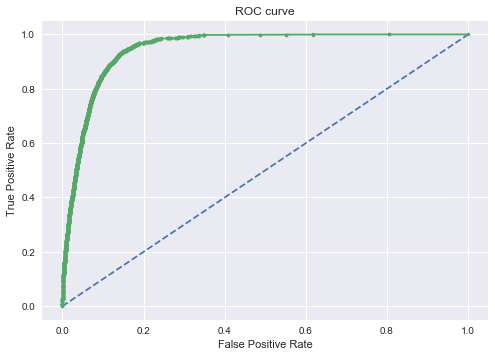

In [217]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the plot
plt.show()

In [234]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93     12062
          1       0.73      0.74      0.74      3062

avg / total       0.89      0.89      0.89     15124



In [ ]:
from sklearn.metrics import accuracy_score

In [237]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train,y_train)
    predictions = model_ann.predict(X_test)
    predictions_train = model_ann.predict(X_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)


Text(0.5,1,'Accuracy vs number of hidden layers')

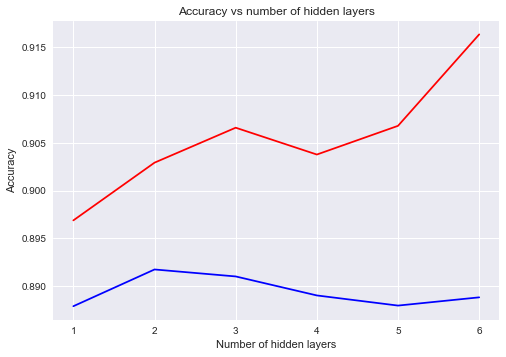

In [246]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of hidden layers')

In [248]:
from keras.models import Sequential
from keras.layers import Dense 

In [249]:
model_keras = Sequential()
model_keras.add(Dense(12, input_shape=(53,), kernel_initializer='uniform', activation='relu'))
model_keras.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model_keras.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [250]:
model_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [254]:
history = model_keras.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


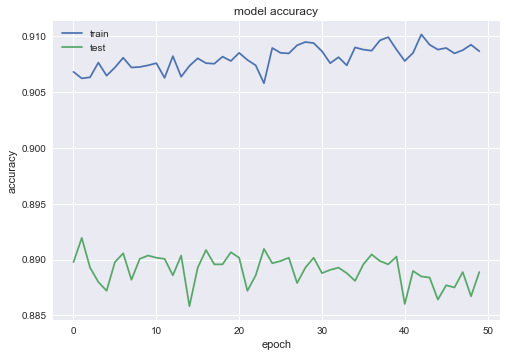

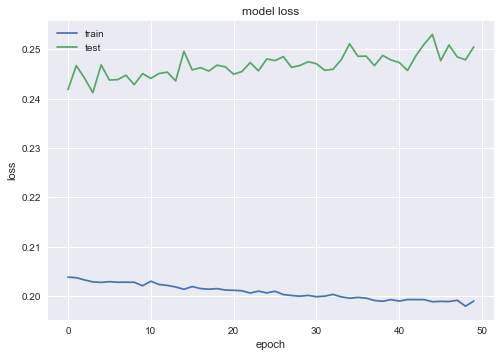

In [255]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()